# Postie Data Challenge Description and Goals

The data science take home challenge is intended to help us evaluate how you perform on a
task reflective of typical data science work at Postie. The test centers on being able to access
data in AWS, read it, figure out and document any problems with it, transform it, then create
meaningful predictions from the data. In addition to the technical work, we are looking for
inquisitiveness and an ability to try to figure out what is important with a given dataset and
communicate those appropriately. Please feel free to ask questions via email to
data@postie.com .

Keep in mind that this is more an exercise in critical thinking than a Kaggle competition. All of
the above will be used as evaluation criteria.

Scenario:
It is July 3rd, 2017. A data analyst just started at your company on July 1st, and has done an
analysis to figure out the sales for 2017-07-03 were $164065.00.

# Input DATA

The system log data is located publically via http in us-east-1 on AWS S3 in the
postie-testing-assets bucket.

Each file contains rows with the following data:
timestamp - the date of the transaction
website_id - the integer value of the website the transaction took place on
customer_id - the integer identifier for the customer
app_version - the version of the software
placeholder - a placeholder column
checkout_amount - the amount in dollars of the complete transaction
url - the full website url that instantiated the transaction, with product names and
product count params

In [2]:
#importing the libraries 
import numpy as np
import pandas as pd

# Importing the data from Amazon AWS-S3 public bucket
url1 = 'https://s3.amazonaws.com/postie-testing-assets/2017-07-01.csv'
url2 = 'https://s3.amazonaws.com/postie-testing-assets/2017-07-02.csv'
url3 = 'https://s3.amazonaws.com/postie-testing-assets/2017-07-03.csv'

url = [url1,url2,url3]

#df1 = pd.read_csv(url1) 
df = pd.concat([pd.read_csv(item) for item in url], ignore_index = True)
df[:8] # first look at the DateFrame


,timestamp,website_id,customer_id,app_version,placeholder,checkout_amount,url
0,2017-07-01T00:00:05-07:00,124,9221,1.1,NaN,6.0,http://xyz.com/checkout?Bignay=1
1,2017-07-01T00:00:14-07:00,124,1639,1.1,NaN,6.0,http://xyz.com/checkout?Ume=1
2,2017-07-01T00:00:15+00:00,124,8272,1.1,NaN,6.0,http://xyz.com/checkout?Natal+Orange=1
3,2017-07-01T00:00:18+00:00,123,6921,1.1,NaN,6.0,http://www.example.com/store/?Natal+Orange=1
4,2017-07-01T00:00:19+00:00,124,9219,1.1,NaN,4.0,http://xyz.com/checkout?Hazelnut=1
5,2017-07-01T00:00:28+00:00,124,8451,1.1,NaN,7.0,http://xyz.com/checkout?Round+Kumquat=1
6,2017-07-01T00:00:32+00:00,124,6079,1.1,NaN,5.0,http://xyz.com/checkout?Ylang-ylang=1
7,2017-07-01T00:00:34-07:00,123,5267,1.1,NaN,5.0,http://www.example.com/store/?Black%2FWhite+Pe...


# Analysis

1. The analyst wants you to figure out why their 2017-07-03 sales value is much lower than their previous day sales summary.

2. The new analyst would also like a report detailing other key metrics for the system. Other than the average sales value per day, are there any other metrics that they should be using? Is an average sales value the right metric to use? Explain why/why not.

3. What information can you extract from the urls? Can you infer all product prices? Is there any other information that you believe would be useful to understand what is going on?

4. Are there any interesting purchasing combinations, events, or metrics that are worth reporting and displaying? What information should the analyst know about the system that you’ve uncovered?

5. Can you predict a the total sales number (in dollars) for 2017-07-04? How certain is the predicted number? State explicitly what the prediction is doing, and what general steps you did to get the number you report and what assumptions you have made.

6. Is there any additional information, data or access that would make your prediction better?

In [4]:
# start by pre-processing the data, extract day, month, year and hour from the datestamp

df['year'] = pd.to_datetime(df['timestamp'].str.slice(0,10)).dt.year
df['month'] = pd.to_datetime(df['timestamp'].str.slice(0,10)).dt.month
df['day'] = pd.to_datetime(df['timestamp'].str.slice(0,10)).dt.day

# checking out the new columns
df[:8]

,timestamp,website_id,customer_id,app_version,placeholder,checkout_amount,url,year,month,day
0,2017-07-01T00:00:05-07:00,124,9221,1.1,NaN,6.0,http://xyz.com/checkout?Bignay=1,2017,7,1
1,2017-07-01T00:00:14-07:00,124,1639,1.1,NaN,6.0,http://xyz.com/checkout?Ume=1,2017,7,1
2,2017-07-01T00:00:15+00:00,124,8272,1.1,NaN,6.0,http://xyz.com/checkout?Natal+Orange=1,2017,7,1
3,2017-07-01T00:00:18+00:00,123,6921,1.1,NaN,6.0,http://www.example.com/store/?Natal+Orange=1,2017,7,1
4,2017-07-01T00:00:19+00:00,124,9219,1.1,NaN,4.0,http://xyz.com/checkout?Hazelnut=1,2017,7,1
5,2017-07-01T00:00:28+00:00,124,8451,1.1,NaN,7.0,http://xyz.com/checkout?Round+Kumquat=1,2017,7,1
6,2017-07-01T00:00:32+00:00,124,6079,1.1,NaN,5.0,http://xyz.com/checkout?Ylang-ylang=1,2017,7,1
7,2017-07-01T00:00:34-07:00,123,5267,1.1,NaN,5.0,http://www.example.com/store/?Black%2FWhite+Pe...,2017,7,1


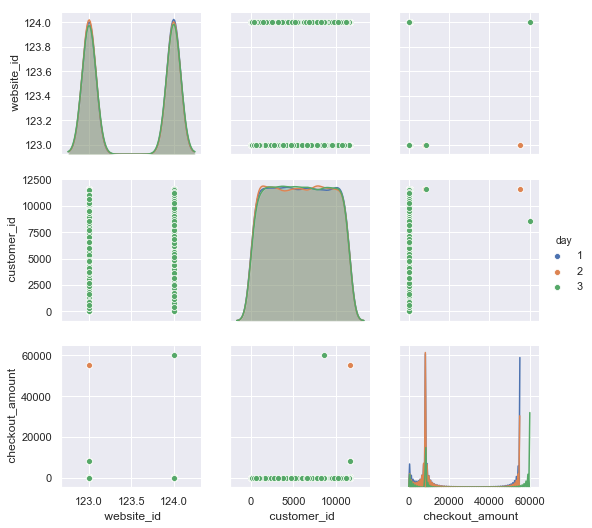

In [5]:
# taking the first visual look at the data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.pairplot(df, hue= 'day',  vars=[' website_id',' customer_id',' checkout_amount']);

# 1. The analyst wants you to figure out why their 2017-07-03 sales value is much lower than their previous day sales summary.
   
   - The day-to-day changes in sales might be within the range of random variability (noise) without significant contribution from external factors. To investigate the spread of the day-to-day variability, the analyst needs more than 3 samples (at least 30 days). Generally speaking however, a significant decline in sales might occur due to a decrease in the number of orders, average size of purchase orders, or both. A change in number of purchase orders might be due to multiple factors i.e. changes in product pricing (discounts, sales etc.), availability of the item in the stock (the most popular item may go out of stock for a day or two), calendar cycles or events (e.g. whether 07-03 is on weekend or its a long weekend before the 4th of july), a marketing or advertising campaign going in/out of effect, a sudden surge in demand occuring in 07-01 that faded away by 07-03 (like a snow storm, or a heatwave, a celebrity tweete, companys quarter report or stock price, partnership news etc.), potential malfunctioning of the infrustructors (i.e. website going out of service temporarily in 07-03, app ugrade, maintenance) and so on. In the following I perform some basic analysis to obtain any information that could support or reject potential relationships between the decline and some of the factors listed above.


# 2. The new analyst would also like a report detailing other key metrics for the system. Other than the average sales value per day, are there any other metrics that they should be using? Is an average sales value the right metric to use? Explain why/why not.

   - The average sales per day is a usefull metric however, it may become biased in the presence of extremely large anomalies e.g. one very large order size may skew the mean. To deal with that, the median sales value per day could be considered as a metric besides the mean. Generally speaking, other quantile values could be used to compare the distribution of the sales for each day. Here I looked at the 99th and 99.9th percentile and the results indicate a much larger (fat) tail for the first of july as compared to the 2nd and 3rd.  
   - Other useful metrics include the spread (deviation from the mean sales), the number of unique customers in each day (one or a few recurrent customers with large orders may push the price up in a single day), total spend customer, volume of sales (total vs individual product), etc.
   

In [6]:
# Calculating total daily sales for each day
daily_df = pd.DataFrame(np.array(range(1,4)), columns = ['day']) 
daily_df['sales'] = np.array(df.groupby('day')[' checkout_amount'].sum())

# Calculating total number of purchases for each day
daily_df['transaction_count'] = list(df['day'].value_counts())

# daily_df['transaction_count'].sum() == len(df.index) # checking if the numbers match 

# Calculating avg sale value for each day
daily_df['sales_avg'] = list(daily_df['sales']/daily_df['transaction_count'])

# Calculating median, 99% quantile and 99.99% quantile sale value for each day
daily_df['sales_50%'] = np.array(df.groupby('day')[' checkout_amount'].quantile(q=.5))
daily_df['sales_99%'] = np.array(df.groupby('day')[' checkout_amount'].quantile(q=.99))
daily_df['sales_99.99%'] = np.array(df.groupby('day')[' checkout_amount'].quantile(q=.9999))

# number of unique customers
daily_df['unique_customers'] = np.array(df.groupby('day')[' customer_id'].nunique())

daily_df

,day,sales,transaction_count,sales_avg,sales_50%,sales_99%,sales_99.99%,unique_customers
0,1,241485.0,11633,20.758618,6.0,123.36,47392.2608,8225
1,2,183300.0,11574,15.837221,6.0,82.12,8257.2810,8198
2,3,164065.0,9981,16.437732,6.0,64.00,8429.3480,7412


# 4. Are there any interesting purchasing combinations, events, or metrics that are worth reporting and displaying? What information should the analyst know about the system that you’ve uncovered?

   - Looking at the trafic ids and app_version indicates no sales reported from app 1.2 in july 1st and 2nd and a sharp decline of sales from app 1.1 in the 3rd. This highlights a possible software upgrade in july 3rd. The anlayst might be interested in doing further analysis on this as the upgrade might have been partially respobsible for the drop in the sales in july the 3rd. 
   - The other important point is the presence of extremely large orders in the data. These outliers can act as a stress and shock the system and need special attention. For july 1st for example, the two largest orders alone together ($110,000) contributed about 50 percent of the total sales for that day ($241,000).

In [7]:

#df[' website_id'].unique()
daily_df['123_traffic'] = np.array(df[df[' website_id']==123].groupby('day')[' website_id'].count())
daily_df['124_traffic'] = np.array(df[df[' website_id']==124].groupby('day')[' website_id'].count())

# traffic for each app version
#df[' app_version'].unique()
daily_df['app1.1_traffic'] = np.array(df.groupby(['day',' app_version']).size().unstack()[1.1])
daily_df['app1.2_traffic'] = np.array(df.groupby(['day',' app_version']).size().unstack()[1.2])

daily_df

,day,sales,transaction_count,sales_avg,sales_50%,sales_99%,sales_99.99%,unique_customers,123_traffic,124_traffic,app1.1_traffic,app1.2_traffic
0,1,241485.0,11633,20.758618,6.0,123.36,47392.2608,8225,5760,5873,11633.0,NaN
1,2,183300.0,11574,15.837221,6.0,82.12,8257.2810,8198,5831,5743,11574.0,NaN
2,3,164065.0,9981,16.437732,6.0,64.00,8429.3480,7412,4966,5015,1792.0,8189.0


In [232]:
df.groupby('day')[' checkout_amount'].nlargest(5)

day       
1    3636     55084.0
     2707     55031.0
     3493      8225.0
     7920      8219.0
     2456       573.0
2    17854    55002.0
     15827     8262.0
     13900     8232.0
     17395      562.0
     15043      556.0
3    27061    60000.0
     24096     8326.0
     31076      557.0
     24608      552.0
     27740      551.0
Name:  checkout_amount, dtype: float64

# 3. What information can you extract from the urls? Can you infer all product prices? Is there any other information that you believe would be useful to understand what is going on?

   - Text mining of the url data can provide some really useful information including the product purchased in each transaction, product price, the most and least frequently purchased products and etc. 
   - According to the following analysis, the product sold on the two websites seems to be fruits and groceries. The url contains the name of each product as well as the size of orders and the price of individual items can be calculate via dividing the checkout_amount by the size of each order.
   - one can analyze the customer IDs and detect potential purchasing patterns (e.g. customer x loves ordering potatos) 
   - one can track trends and history of sales of the individual products and their responce to changes in other features of the data such as app version update etc.
   - It helps to track some detailed information about the extremely large orders aka outliers. For example, there are multiple orders with sizes greater than one thausand. For these events, the url can help identify the items that could go out of stock soon and help optimizing the supply chain management. 

In [59]:
# performing NLP on URLs
import nltk  # Import nltk

# Get English stopwords and add extra stopwords to handle url syntaxes
sw = nltk.corpus.stopwords.words('english')+ \
['.',',','--','\'s','?',')','(',':','\'','\'re','"','-','}','{',u'—'] + \
['http','https','www','com','/','//','example','store','xyz','checkout']

url_word = df[' url'].str.findall('\w+')    # find (tokenize) all the words in urls
url_word.apply(lambda x: [item.lower() for item in x ])    # convert capital letters to lower case
df['url_tokens'] = url_word.apply(lambda x: [item for item in x if item not in sw])    # convert capital letters to lower case
df['url_tokens'][:8]

Plotting the frequency distribution of the tokenized words in the urls

In [111]:
list_tokens = df['url_tokens'].tolist()
#flat_list = list(map(lambda x: [item for sublist in x for item in sublist], list_tokens))
flat_list = [y for x in list_tokens for y in x]
filt = list(filter(lambda x: x not in str(list(range(200))), flat_list)) # filtering the list for high density numbers

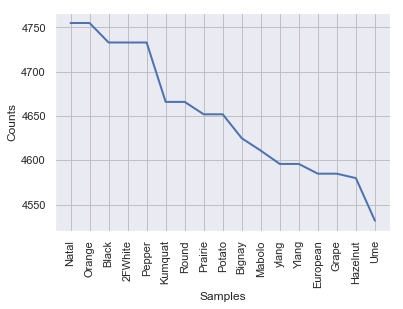

In [228]:
import matplotlib.pyplot as plt

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
frqdst1 = nltk.FreqDist(filt)
frqdst1.plot(17)    # used the first 17 cuz there are only 17 words in the flattened list and the rest are numbers

# 5. Can you predict a the total sales number (in dollars) for 2017-07-04? How certain is the predicted number? State explicitly what the prediction is doing, and what general steps you did to get the number you report and what assumptions you have made.

   - One can predict the total sales from a linear regression model using the sales in previous days but it is not reliable at all as there are only 3 data samples. 
   - Not certain at all. Reliable prediction of the sales based on statistal methods and ML approaches requires long recorde of high quality data.  
   - As an example, I built two linear regression models one uses the first two days for training and the 3rd day for test and the second one uses all three days to train and no test. For these models, day numeber is the independent variable (X) and the total daily sales is the dependent variable (Y). This model assumes a linear trend between the two variables and provides an estimate for the 4th day according to the trend observed in the test data. In practice this could be a very naive assumtion resulting in inaccurate predictions. 


In [214]:
from sklearn.linear_model import LinearRegression

# dividing the data to test and train 
x_train1 = np.array(daily_df['day']).reshape(-1,1)[:-1]
y_train1 = np.array(daily_df['sales']).reshape(-1,1)[:-1]

x_test1 = np.array(daily_df['day'][2]).reshape(1,-1)
y_test1 = np.array(daily_df['sales'][2]).reshape(1,-1)

# train the model over the training data
linreg1 = LinearRegression().fit(x_train1, y_train1)

# using the model to predict the test data
y_pred3 = linreg1.predict(x_test1)

sales4_reg1 = linreg1.predict(np.array([4]).reshape(1,-1))
sales4_reg1

array([[ 66930.]])

In [216]:
# dividing the data to test and train 
x_train2 = np.array(daily_df['day']).reshape(-1,1)
y_train2 = np.array(daily_df['sales']).reshape(-1,1)

# train the model over the training data
linreg2 = LinearRegression().fit(x_train2, y_train2)

sales4_reg2 = linreg2.predict(np.array([4]).reshape(1,-1))
sales4_reg2

array([[ 118863.33333333]])

# 6. Is there any additional information, data or access that would make your prediction better?

   - An access to a longer record of data would potentially improve the model's skill. The simple linear regression maybe be prone to underfitting and having a larger number of data samples enables developing more complex models such as recurrent neural networks (RCC) that may capture the complexity of the data better. 